## NETFLIX VISUALIZATION ASSIGNMENT

In [1]:
#importing the needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#DISPLAYING THE FIRST FEW DATA

df = pd.read_csv('netflix_titles.csv')

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#Displaying the few last values of the data 

df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
#Getting the information obout the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#Getting the missing values of our data 

df.isnull().sum()



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df = df.dropna(subset=['date_added', 'rating', 'duration'])   # dropping rows with missing values 

In [7]:
df['director'] = df['director'].fillna('No Record')   # filling up the missing values


In [8]:
df['cast'] = df['cast'].fillna('No Record')       # filling up the missing values 

In [9]:
df['country'] = df['country'].fillna('No Record')      #filling up the missing values 

In [10]:
#Ensuring there are no longer missing values 

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df['duration'].value_counts()   # counts the unique values of the duration of time

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [12]:
df['duration'] = df['duration'].str.strip('Season')
df['duration'] = df['duration'].str.strip('Seasons')
df['duration'] = df['duration'].str.strip('min')

In [13]:
df['duration'].value_counts()

1       1791
2        421
3        199
90       152
94       146
        ... 
189        1
273        1
212        1
224        1
191        1
Name: duration, Length: 210, dtype: int64

In [14]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

## Distribution of Movies to Series

### Percentage of Tv shows and Movies

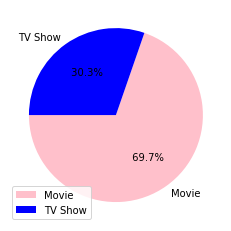

In [15]:
plt.pie(df['type'].value_counts(), 
        labels=df['type'].value_counts().index,
        colors=['Pink', 'blue'], startangle=180,
        autopct='% 1.1F%%'
        
       )
plt.legend();

## TV SHOW SUBSET

In [16]:
df['director'].value_counts()


No Record                         2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [17]:
df_tvshow = df[df['type'] == 'TV Show']
df_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Record,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Record,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Record,No Record,No Record,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Record,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No Record,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [18]:
# getting the counts of directors in the dataset
df['director'].value_counts()

No Record                         2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [19]:
# Split the movie directors to only include 1 name
tvshow_directors = df_tvshow['director'].str.split(',', expand=True).stack()
# convert to a dataframe
tvshow_directors = pd.DataFrame(tvshow_directors)
tvshow_directors.head(20)

,,0
1,0,No Record
2,0,Julien Leclercq
3,0,No Record
4,0,No Record
5,0,Mike Flanagan
8,0,Andy Devonshire
10,0,No Record
11,0,Kongkiat Komesiri
14,0,No Record
15,0,No Record


In [20]:
#top tv show directors

tvshow_directors.columns = ['Directors']

In [30]:
tvshow_directors = tvshow_directors[tvshow_directors['Directors'] != 'No Record']

tvshow_directors = tvshow_directors.groupby(['Directors']).size().reset_index(name='Total TV Show')

In [31]:
top_directors = pd.DataFrame(tvshow_directors.sort_values(by=['Total TV Show'], ascending=False)).head(10)
top_directors

,Directors,Total TV Show
0,Abhishek Chaubey,1
206,Malik Nejer,1
204,Lynn Novick,1
203,Luis Alfaro,1
202,Luis Alberto Restrepo,1
201,Lee Yoon-jung,1
200,Lee Toland Krieger,1
199,Lee Kyoungmi,1
198,Lee Eung-bok,1
197,Laurent Bouzereau,1


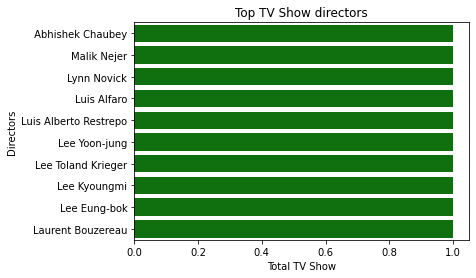

In [32]:
sns.barplot(y='Directors', x='Total TV Show', data=top_directors, color='green')
plt.title('Top TV Show directors');

In [33]:
#this shows that most tv show directors haven't produced more than one tv show

## TV SHOW DISTRIBUTION

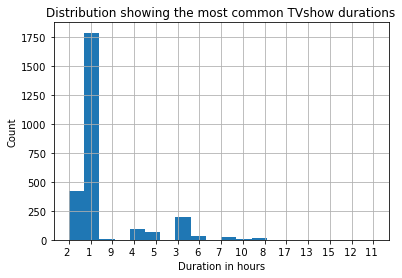

In [34]:
df_tvshow['duration'].hist(bins=20)
plt.xlabel('Duration in hours')
plt.ylabel('Count')
plt.title('Distribution showing the most common TVshow durations');

## TOP TV SHOW COUNTRY


In [38]:
# Expanding the countries to only include one country 
countries = df_tvshow['country'].str.split(',', expand=True).stack()
# removing the white sapces before and after country names to avoid duplicates
countries = countries.str.strip(' ')

In [39]:
countries.value_counts()

United States           932
No Record               390
United Kingdom          271
Japan                   197
South Korea             170
                       ... 
Malta                     1
United Arab Emirates      1
Belarus                   1
Uruguay                   1
Switzerland               1
Length: 67, dtype: int64

In [40]:
top_countries = countries.value_counts().head(15)

In [41]:
top_countries = pd.DataFrame(top_countries)
top_countries.columns = ['TV Show count']
top_countries

,TV Show count
United States,932
No Record,390
United Kingdom,271
Japan,197
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,64


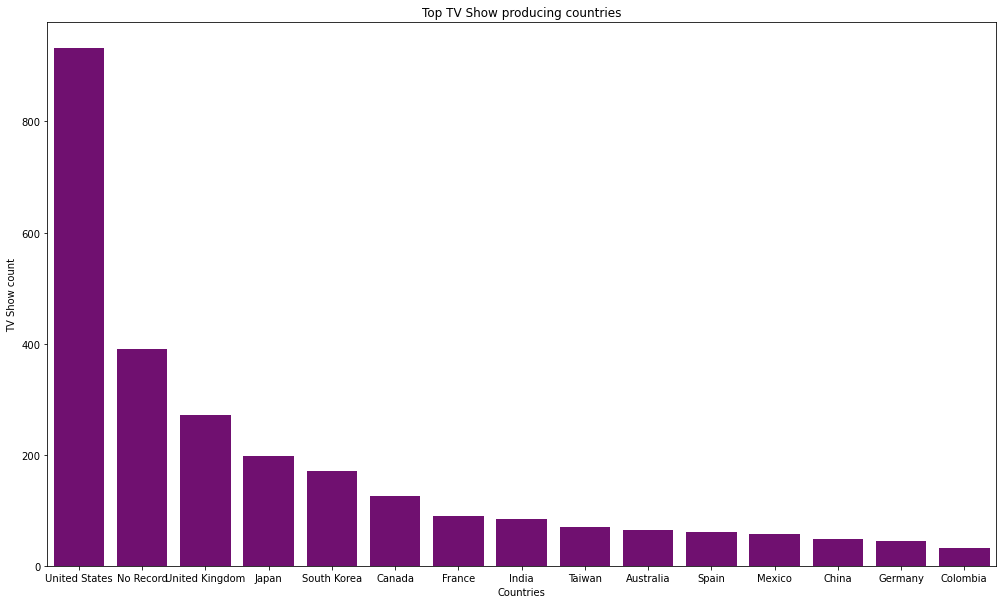

In [44]:
# A bar plot to show the top movie producing countries
plt.figure(figsize=(17, 10))
sns.barplot(x=top_countries.index, y=top_countries['TV Show count'], data=top_countries, color='purple')
plt.xlabel('Countries')
plt.title('Top TV Show producing countries');

In [45]:
# This bar chart shows that United States is the largest TV Show producing country

## TOP TV SHOW ACTORS

In [47]:
actors = df_tvshow['cast'].str.split(',', expand=True).stack()
actors = pd.DataFrame(actors)
actors.head()

0
1 0         Ama Qamata
  1        Khosi Ngema
  2      Gail Mabalane
  3     Thabang Molaba
  4   Dillon Windvogel

In [48]:
actors.columns = ['cast']

In [51]:
actors = actors[actors['cast'] != 'No Record']
actors.head()

cast
1 0         Ama Qamata
  1        Khosi Ngema
  2      Gail Mabalane
  3     Thabang Molaba
  4   Dillon Windvogel

In [52]:
# Selecting the top 15 actors
top_actors = actors.value_counts().head(10)
top_actors

cast              
 Takahiro Sakurai     24
 Yuki Kaji            17
 Junichi Suwabe       17
 Ai Kayano            16
David Attenborough    14
 Daisuke Ono          14
 Yoshimasa Hosoya     13
 Yuichi Nakamura      13
 Takehito Koyasu      13
 Kana Hanazawa        12
dtype: int64

In [53]:
top_actors = pd.DataFrame(top_actors)
# renaming the column
top_actors.columns = ['TV Show acted']
top_actors

,TV Show acted
cast,
Takahiro Sakurai,24
Yuki Kaji,17
Junichi Suwabe,17
Ai Kayano,16
David Attenborough,14
Daisuke Ono,14
Yoshimasa Hosoya,13
Yuichi Nakamura,13
Takehito Koyasu,13


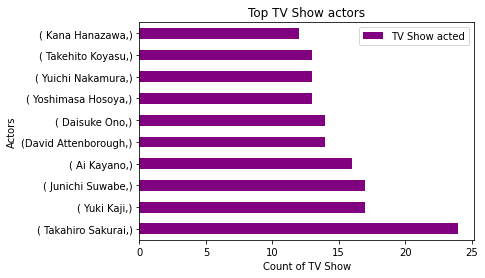

In [59]:
# A horizontal bar chart to show the top movie actors
top_actors.plot(kind='barh',color='purple')
plt.xlabel('Count of TV Show')
plt.ylabel('Actors')
plt.title('Top TV Show actors');

In [60]:
# This bar plot shows that the top actor is Takahiro Sakurai

In [65]:
##Release year of movies and TV SHOW in the last 5year

In [66]:
df['release_year'].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [67]:
# Selecting two columns to perform a bi-variate analysis
df_release = df[['type','release_year']]
# Selecting the last 10 years
last_5_years = df_release[df['release_year'] >= 2017]
last_5_years

,type,release_year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8774,Movie,2018
8775,TV Show,2018
8786,Movie,2017
8787,Movie,2017


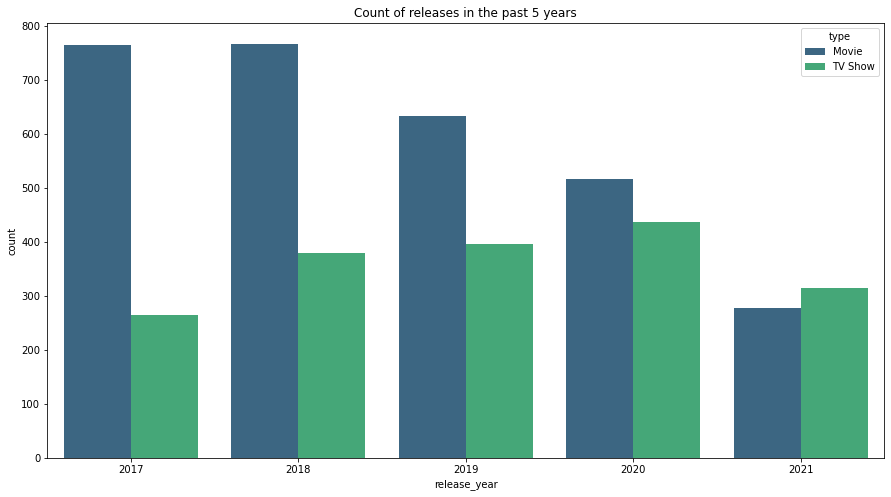

In [70]:
# A bar plot showing the counts of movies and series produced in the last 10 years
plt.figure(figsize=(15, 8))
sns.countplot(x='release_year', data=last_5_years, hue='type', palette='viridis')
plt.title('Count of releases in the past 5 years');

In [71]:
# this bar plot hows that the highest number of movies produced were in the years 2017 and 2018
# It also shows that the highest number of tv shows were produced in 2020

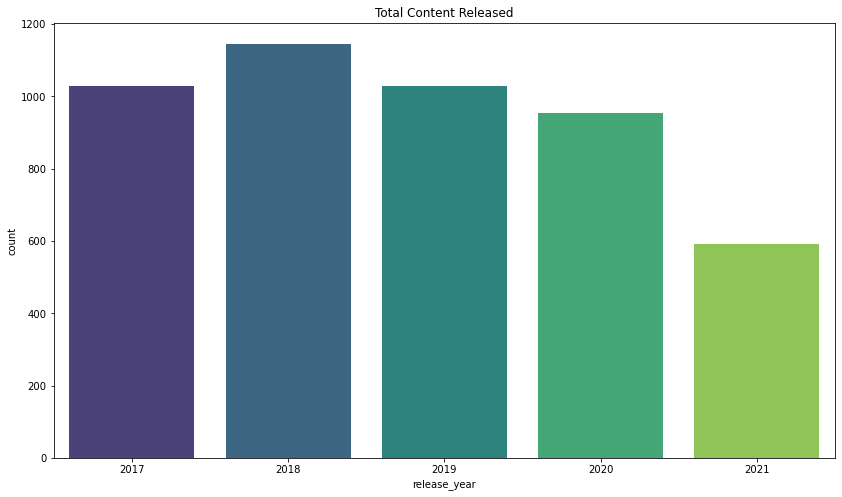

In [72]:
# A count plot showing the total movies and Tv shows released
plt.figure(figsize=(14, 8))
sns.countplot(x='release_year', data=last_5_years, palette='viridis')
plt.title('Total Content Released');

## Directors with the longest TV Shows

In [80]:
longest_tvshow = df_tvshow[['director','duration']]
longest_tvshow= longest_tvshow[longest_tvshow['director'] != 'No Record']

In [103]:
directors_longest = longest_tvshow[longest_tvshow['duration']> '210' ]

In [104]:
directors_longest = directors_longest.set_index(['director'])

##RATINGS

In [92]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [93]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [94]:
# creating a dictionary to reorganise the ratings
new_categories = {
    'TV-PG': 'Parental Guidance',
    'TV-MA': 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
df["rating"] = df['rating'].replace(new_categories)
df['rating'].value_counts()

Mature Audience      4089
Teens                3273
Parental Guidance     861
General Audience      567
Name: rating, dtype: int64

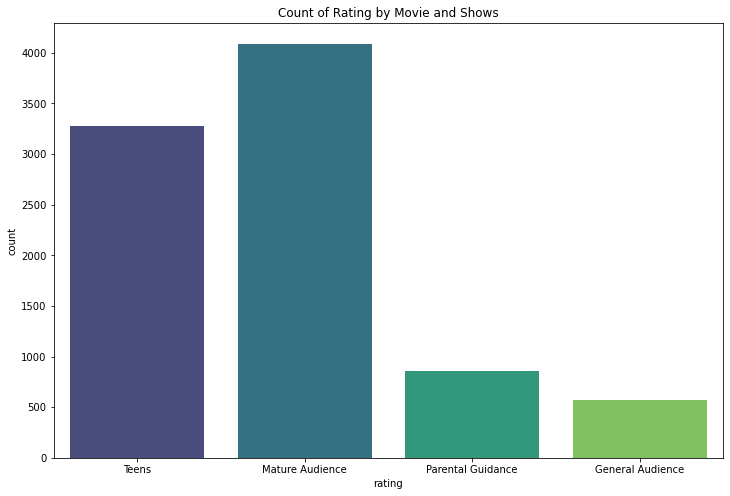

In [95]:
plt.figure(figsize=(12,8))
sns.countplot(x="rating", data=df, palette="viridis")
plt.title("Count of Rating by Movie and Shows");

## Longest TV Show ratings

In [97]:
ratings = df[['rating', 'duration']]
ratings.value_counts()

rating             duration
Mature Audience    1           777
Teens              1           628
Parental Guidance  1           239
Mature Audience    2           190
General Audience   1           147
                              ... 
                   173           1
                   181           1
                   19            1
                   20            1
Parental Guidance  16            1
Length: 610, dtype: int64

In [101]:
# subsetting to only include the ratings with more than 210 minutes
longest_ratings = ratings[ratings['duration'] > '210']
# setting the index to the rating column
longest_ratings = longest_ratings.set_index(['rating'])
longest_ratings

,duration
rating,
Teens,90
Teens,91
Teens,9
Parental Guidance,91
Mature Audience,4
...,...
Teens,98
Teens,3
Mature Audience,96
